# 런타임 유형변경 필수
-

# 라이브러리 환경
- tensorflow 버전 1.x과 2.x
  + 예시 : 회사에 입사했는데, 기존에 구축되어 있는 tensorflow 1.x 버전으로 구축이 되어 있다...!!! ==> 퇴사를 진지하게 고민
  + 위 두 버전은 완전히 다름
- pytorch는 numpy와 문법이 유사
- 텐서플로는 1.x 완전 새로운 언어
  + Google 대응 : keras 프레임워크를 텐서플로에 탑재를 시작, pytorch와 경쟁이 가능해짐

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

- 정규화

In [4]:
# 정규화 (0~255 ===> 0~1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Tensorflow, PyTorch 비교
- 텐서플로 : 입문자 입장에서는 쉬운 프레임워크
  + Google ==> 안드로이드
  + 딥러닝 모델을 배포하는 관점에서는 항상 비교우위
  + 실무자들이 좋아하는 프레임워크
- Pytorch : 입문자 입장에서는 훨씬 쉬움
  + 연구, 개발분야에서 많이 사용
  + 대학원생 포함, 아카데믹 서클

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 모델 구성
model = models.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(), # 1차원으로 변경, 완전연결, 분류
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 82ms/step - accuracy: 0.3079 - loss: 1.8664 - val_accuracy: 0.5025 - val_loss: 1.3800
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.5313 - loss: 1.3060 - val_accuracy: 0.5552 - val_loss: 1.2330
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 82ms/step - accuracy: 0.5962 - loss: 1.1469 - val_accuracy: 0.6099 - val_loss: 1.0944
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.6331 - loss: 1.0388 - val_accuracy: 0.6364 - val_loss: 1.0224
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.6661 - loss: 0.9570 - val_accuracy: 0.6483 - val_loss: 0.9995
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.6863 - loss: 0.9019 - val_accuracy: 0.6636 - val_loss: 0.9520
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.6986 - loss: 0.8640 - val_accuracy: 0.6713 - val_loss: 0.9470
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.7165 - loss: 0.8093 - 

313/313 - 4s - 13ms/step - accuracy: 0.6863 - loss: 0.9039

Test accuracy: 0.6863


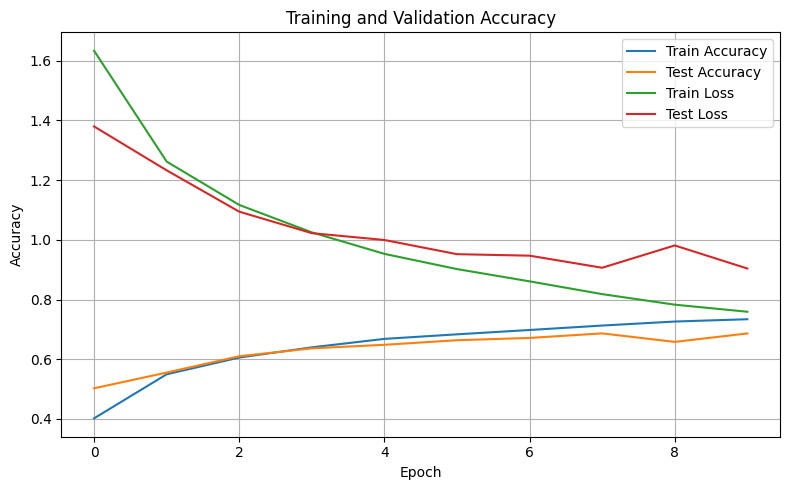

In [19]:
import matplotlib.pyplot as plt

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(history.history['accuracy'], label='Train Accuracy')
ax.plot(history.history['val_accuracy'], label='Test Accuracy')
ax.plot(history.history['loss'], label='Train Loss')
ax.plot(history.history['val_loss'], label='Test Loss')

ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Validation Accuracy')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

# 테스트

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


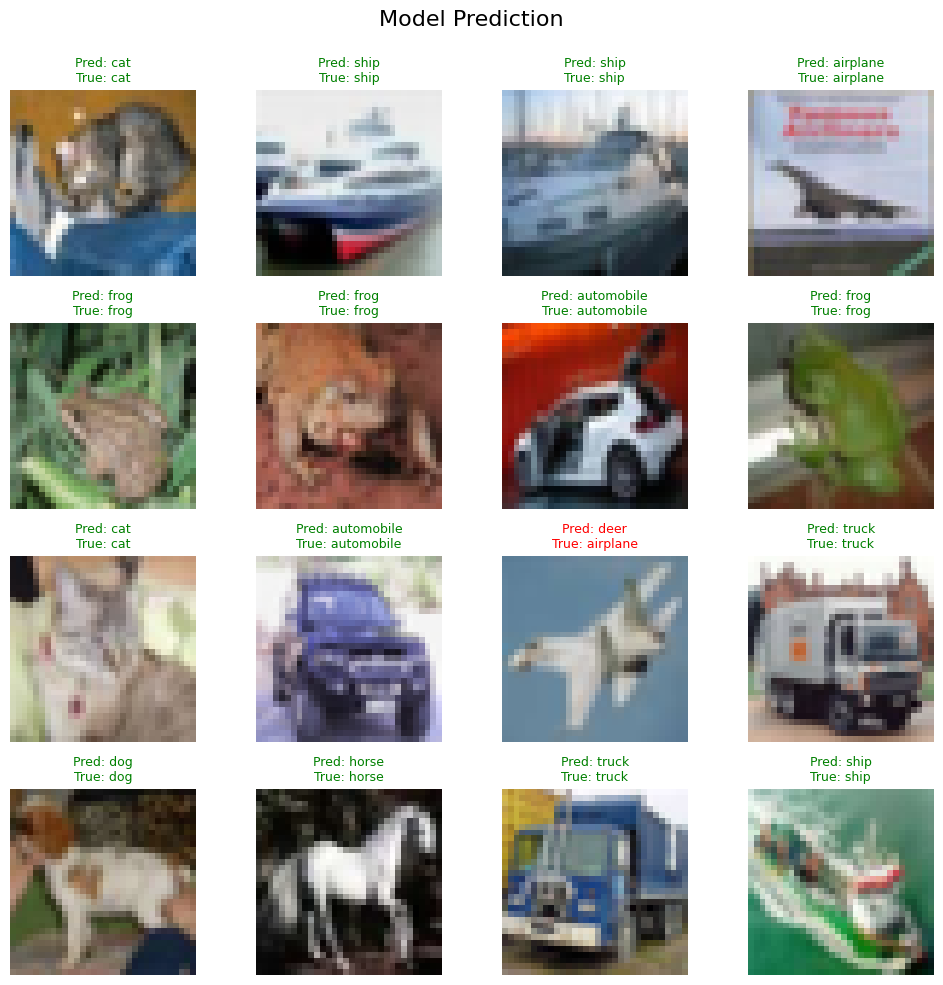

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 예측 수행
pred_probs = model.predict(x_test[:16])
pred_labels = np.argmax(pred_probs, axis=1)

# 실제 라벨
true_labels = y_test[:16].flatten()

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle('Model Prediction', fontsize=16)
for i, ax in enumerate(ax.flat):
  ax.imshow(x_test[i])
  ax.set_title(f"Pred: {class_names[pred_labels[i]]}\nTrue: {class_names[true_labels[i]]}",
                 fontsize=9,
                 color='green' if pred_labels[i] == true_labels[i] else 'red')
  ax.axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()